In [3]:

import zipfile

zip_path = '/content/animals10.zip'  # Replace with the actual path
extract_path = '/content/dataset'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [12]:
# === CORRECTED CODE FOR CREATING THE GENERATORS ===

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the data augmentation configuration
# This should be the same as before
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Use 20% of the data for validation
)

# This is the path from your screenshot.
# It MUST point to the directory that directly contains 'cane', 'gatto', etc.
CORRECT_PATH = '/content/dataset/animals10/raw-img'

# Create the training generator
train_generator = train_datagen.flow_from_directory(
    CORRECT_PATH,
    target_size=(224, 224),
    batch_size=32,
    # Make sure class_mode matches what you used for training ('sparse' in your case)
    class_mode='sparse',
    subset='training'
)

# Create the validation generator
validation_generator = train_datagen.flow_from_directory(
    CORRECT_PATH,
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    subset='validation'
)

# This will now print the correct output
print("\n--- Verification ---")
print(f"Training generator found {len(train_generator.class_indices)} classes.")
print(f"Validation generator found {len(validation_generator.class_indices)} classes.")
print("Class Labels:", list(train_generator.class_indices.keys()))

Found 20947 images belonging to 10 classes.
Found 5232 images belonging to 10 classes.

--- Verification ---
Training generator found 10 classes.
Validation generator found 10 classes.
Class Labels: ['cane', 'cavallo', 'elefante', 'farfalla', 'gallina', 'gatto', 'mucca', 'pecora', 'ragno', 'scoiattolo']


In [3]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models

base_model = MobileNetV2(input_shape=(224, 224, 3),
                           include_top=False,
                           weights='imagenet')

base_model.trainable = False  # Freeze the base model

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(10, activation='softmax')  # 10 for the number of animal classes
])

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    train_generator,
    epochs=10,  # Start with a smaller number of epochs and increase if needed
    validation_data=validation_generator
)

Epoch 1/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 323s 480ms/step - accuracy: 0.9872 - loss: 0.0486 - val_accuracy: 1.0000 - val_loss: 2.7529e-04
Epoch 2/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 304s 465ms/step - accuracy: 1.0000 - loss: 1.3404e-04 - val_accuracy: 1.0000 - val_loss: 1.1603e-04
Epoch 3/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 328s 500ms/step - accuracy: 1.0000 - loss: 5.6327e-05 - val_accuracy: 1.0000 - val_loss: 6.8073e-05
Epoch 4/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 312s 476ms/step - accuracy: 1.0000 - loss: 3.2981e-05 - val_accuracy: 1.0000 - val_loss: 4.2694e-05
Epoch 5/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 331s 506ms/step - accuracy: 1.0000 - loss: 1.9721e-05 - val_accuracy: 1.0000 - val_loss: 2.9745e-05
Epoch 6/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 304s 464ms/step - accuracy: 1.0000 - loss: 1.1622e-05 - val_accuracy: 1.0000 - val_loss: 2.0454e-05
Epoch 7/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 320s 461ms/step - accuracy: 1.0000 - loss: 7.9522e-06 - val_accuracy: 1.0000 - val_loss: 1.4574e-05
Epoch 8/10
655/655 ━━━━━

In [7]:
# Re-run this cell to be certain the model is saved correctly
model.save('animal_classifier_v1_overfit.keras')
print("Model has been saved to 'animal_classifier_v1_overfit.keras'")

Model has been saved to 'animal_classifier_v1_overfit.keras'


In [17]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# --- A. CHECK IF THE TRAIN_GENERATOR EXISTS AND IS CORRECT ---
try:
    class_labels = list(train_generator.class_indices.keys())
    print(f"Successfully found 'train_generator'.")
    print(f"Number of classes found by generator: {len(class_labels)}")
    print(f"Class labels: {class_labels}\n")
except NameError:
    print("FATAL: The 'train_generator' variable does not exist in memory.")
    print("Please go back and re-run the cell that creates the ImageDataGenerator and train_generator.\n")
    # Stop the script if the generator doesn't exist
    raise

# --- B. LOAD THE MODEL AND PREDICT ---
model_path = 'animal_classifier_v1_overfit.keras'
try:
    model = tf.keras.models.load_model(model_path)
    img_path = 'test.jpeg'

    print("--- Starting Prediction ---")
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_batch = np.expand_dims(img_array, axis=0)
    img_preprocessed = img_batch / 255.

    prediction = model.predict(img_preprocessed)

    # --- C. PRINT DIAGNOSTIC INFO ---
    print(f"Model prediction shape: {prediction.shape}")
    print(f"Raw prediction array: {prediction}")

    predicted_class_index = np.argmax(prediction)
    print(f"Predicted class index: {predicted_class_index}")

    confidence = np.max(prediction)

    # --- D. DECODE AND DISPLAY ---
    predicted_animal = class_labels[predicted_class_index] # This is the line that previously failed

    print("\n--- Results ---")
    plt.imshow(img)
    plt.title(f"Prediction: {predicted_animal}\nConfidence: {confidence:.2%}")
    plt.axis('off')
    plt.show()

except Exception as e:
    print(f"\nAn error occurred during the prediction step: {e}")

Successfully found 'train_generator'.
Number of classes found by generator: 10
Class labels: ['cane', 'cavallo', 'elefante', 'farfalla', 'gallina', 'gatto', 'mucca', 'pecora', 'ragno', 'scoiattolo']


An error occurred during the prediction step: File not found: filepath=animal_classifier_v1_overfit.keras. Please ensure the file is an accessible `.keras` zip file.


In [4]:
# === STEP 1: RE-CREATE THE DATA GENERATORS (Just to be safe) ===
# This ensures our data sources are correctly configured before training.

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Define the data augmentation configuration. We can make it slightly more aggressive.
train_datagen_v2 = ImageDataGenerator(
    rescale=1./255,
    rotation_range=45,       # Increased
    width_shift_range=0.25,  # Increased
    height_shift_range=0.25, # Increased
    shear_range=0.2,
    zoom_range=0.3,          # Increased
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

# The correct path to the folder containing your 10 animal subdirectories
CORRECT_PATH = '/content/dataset/animals10/raw-img'

# Create the training and validation generators
train_generator_v2 = train_datagen_v2.flow_from_directory(
    CORRECT_PATH,
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    subset='training'
)

validation_generator_v2 = train_datagen_v2.flow_from_directory(
    CORRECT_PATH,
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    subset='validation'
)

print(f"Found {len(train_generator_v2.class_indices)} classes for the new model.")


# === STEP 2: BUILD THE NEW MODEL ARCHITECTURE WITH DROPOUT ===

# Load the base MobileNetV2 model again
base_model_v2 = tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3),
                                                  include_top=False,
                                                  weights='imagenet')

# Freeze the base model layers
base_model_v2.trainable = False

# Define the new, improved architecture
model_v2 = models.Sequential([
    base_model_v2,
    layers.GlobalAveragePooling2D(),
    # THIS IS THE KEY: Add a Dropout layer to fight overfitting.
    # It will randomly drop 50% of the neurons during training.
    layers.Dropout(0.5),
    # The final classification layer for our 10 animals
    layers.Dense(10, activation='softmax')
])

print("\nNew Model v2 Architecture:")
model_v2.summary()


# === STEP 3: COMPILE AND TRAIN THE NEW MODEL ===

# Compile the new model
model_v2.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])

print("\nStarting training for Model v2...")

# Train the model. It will take about the same amount of time.
history_v2 = model_v2.fit(
    train_generator_v2,
    epochs=5,  # We can train for a few more epochs since it's harder to overfit now
    validation_data=validation_generator_v2
)

# === STEP 4: SAVE THE NEW, BETTER MODEL ===
print("\nTraining complete. Saving the new model...")
model_v2.save('animal_classifier_v2_robust.keras')
print("Model 'animal_classifier_v2_robust.keras' saved successfully!")

Found 20947 images belonging to 10 classes.
Found 5232 images belonging to 10 classes.
Found 10 classes for the new model.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step

New Model v2 Architecture:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        12,810 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,270,794 (8.66 MB)

 Trainable params: 12,810 (50.04 KB)

 Non-trainable params: 2,257,984 (8.61 MB)


Starting training for Model v2...


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
655/655 ━━━━━━━━━━━━━━━━━━━━ 341s 504ms/step - accuracy: 0.6526 - loss: 1.1036 - val_accuracy: 0.8842 - val_loss: 0.3542
Epoch 2/5
655/655 ━━━━━━━━━━━━━━━━━━━━ 324s 494ms/step - accuracy: 0.8382 - loss: 0.5099 - val_accuracy: 0.8846 - val_loss: 0.3576
Epoch 3/5
655/655 ━━━━━━━━━━━━━━━━━━━━ 324s 495ms/step - accuracy: 0.8497 - loss: 0.4643 - val_accuracy: 0.8901 - val_loss: 0.3540
Epoch 4/5
655/655 ━━━━━━━━━━━━━━━━━━━━ 323s 493ms/step - accuracy: 0.8553 - loss: 0.4535 - val_accuracy: 0.8878 - val_loss: 0.3438
Epoch 5/5
655/655 ━━━━━━━━━━━━━━━━━━━━ 323s 493ms/step - accuracy: 0.8535 - loss: 0.4674 - val_accuracy: 0.8912 - val_loss: 0.3432

Training complete. Saving the new model...
Model 'animal_classifier_v2_robust.keras' saved successfully!


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step

--- Prediction Results ---


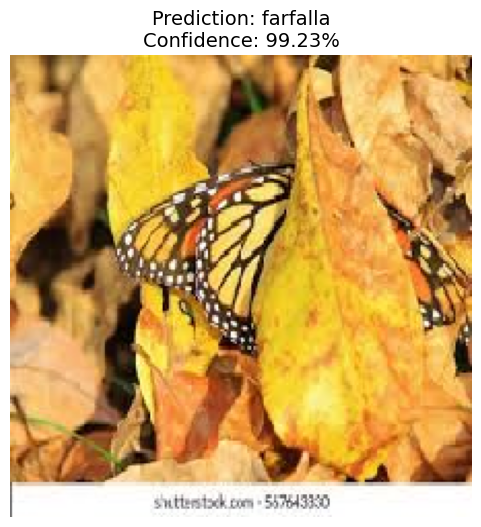

In [5]:
# === FIX and TEST SCRIPT ===
"""
# The 'model_v2' variable should still be in memory. Let's save it again.
print("Attempting to save the model again...")
try:
    model_v2.save('animal_classifier_v2_robust.keras')
    print("Model 'animal_classifier_v2_robust.keras' saved successfully... again!")
except NameError:
    print("FATAL: The 'model_v2' variable is no longer in memory. You will need to retrain.")
    # Stop the script if the model isn't in memory.
    raise
"""
# Now we run the exact same testing code, confident the file exists.
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

model_path = 'animal_classifier_v2_robust.keras'
img_path = 'test8.jfif'

try:
    model = tf.keras.models.load_model(model_path)
    class_labels = list(train_generator_v2.class_indices.keys())

    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_batch = np.expand_dims(img_array, axis=0)
    img_preprocessed = img_batch / 255.

    prediction = model.predict(img_preprocessed)
    predicted_class_index = np.argmax(prediction)
    confidence = np.max(prediction)
    predicted_animal = class_labels[predicted_class_index]

    print("\n--- Prediction Results ---")
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.title(f"Prediction: {predicted_animal}\nConfidence: {confidence:.2%}", fontsize=14)
    plt.axis('off')
    plt.show()

except Exception as e:
    print(f"An unexpected error occurred: {e}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
--- Prediction Results ---


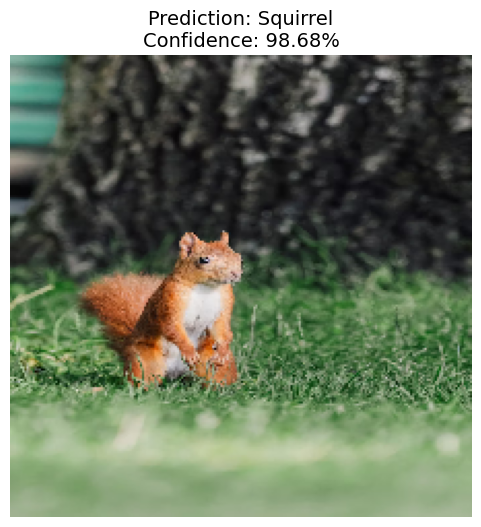

In [26]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# === NEW: 1. CREATE THE TRANSLATION DICTIONARY ===
# This dictionary maps the Italian folder names to the desired English output.
translation_dict = {
    'cane': 'Dog',
    'cavallo': 'Horse',
    'elefante': 'Elephant',
    'farfalla': 'Butterfly',
    'gallina': 'Chicken',
    'gatto': 'Cat',
    'mucca': 'Cow',
    'pecora': 'Sheep',
    'ragno': 'Spider',
    'scoiattolo': 'Squirrel'
}

# --- 2. LOAD THE MODEL AND IMAGE ---
model_path = 'animal_classifier_v2_robust.keras'
img_path = 'test6.jpg' # Or any other image you want to test

# --- 3. RUN THE PREDICTION (Same as before) ---
try:
    model = tf.keras.models.load_model(model_path)
    # Get the original Italian class labels from the generator
    class_labels_italian = list(train_generator_v2.class_indices.keys())

    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_batch = np.expand_dims(img_array, axis=0)
    img_preprocessed = img_batch / 255.

    prediction = model.predict(img_preprocessed)
    predicted_class_index = np.argmax(prediction)
    confidence = np.max(prediction)

    # --- MODIFIED: 4. TRANSLATE THE PREDICTION ---

    # First, get the original Italian prediction (like before)
    predicted_animal_italian = class_labels_italian[predicted_class_index]

    # Now, use the dictionary to get the English translation
    predicted_animal_english = translation_dict.get(predicted_animal_italian, "Unknown") # .get is safer

    # --- 5. DISPLAY THE FINAL RESULT IN ENGLISH ---
    print("--- Prediction Results ---")
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    # Display the final English prediction
    plt.title(f"Prediction: {predicted_animal_english}\nConfidence: {confidence:.2%}", fontsize=14)
    plt.axis('off')
    plt.show()

except Exception as e:
    print(f"An error occurred: {e}")